In [346]:
import tensorflow as tf
import model
import nn_model
import preprocessing
import vocab
import utils
import evaluate

In [3]:
import sklearn
import matplotlib.pyplot as plt

In [391]:
config = {'n_epochs': 500,
          'n_features': 50,
          'n_labels': 3,
          'n_layers': 2,
          'hidden_sizes': [20, 20],
          'lr': .0005,
          'batch_size': 1500,
          'activation': tf.nn.relu,
          'optimizer': tf.train.AdamOptimizer,
          'initializer': tf.contrib.layers.xavier_initializer(uniform=False)
          }

In [5]:
glove_file = 'data/glove/glove.6B.50d.txt'
glove_dim = 50
emb_data = vocab.get_glove(glove_file, glove_dim)

100%|██████████| 400000/400000 [00:11<00:00, 35418.19it/s]

Loading GLoVE vectors from file: data/glove/glove.6B.50d.txt


In [6]:
train_data = preprocessing.load_data('data/train.csv')

In [390]:
subset = train_data.head(10000)
inputs = preprocessing.tokenize_df(subset)

In [392]:
labels = preprocessing.filter_labels(subset, ['toxic', 'obscene', 'insult'])

In [394]:
reload(model)
reload(nn_model)
reload(preprocessing)

<module 'preprocessing' from 'preprocessing.pyc'>

In [395]:
inputs_train, labels_train, inputs_dev, labels_dev = preprocessing.split_train_dev(inputs, labels, shuffle=False)

In [396]:
tf.reset_default_graph()
with tf.Graph().as_default() as graph: 
    obj = nn_model.FeedForwardNeuralNetwork(config, emb_data=glove_data)
    init_op = tf.global_variables_initializer()
graph.finalize()

In [397]:
with tf.Session(graph=graph) as sess:
    sess.run(init_op)
    list_loss = obj.train(sess, inputs_train, labels_train, shuffle=False)
    y_score_train = obj.predict(sess, inputs_train)
    y_score_dev = obj.predict(sess, inputs_dev)

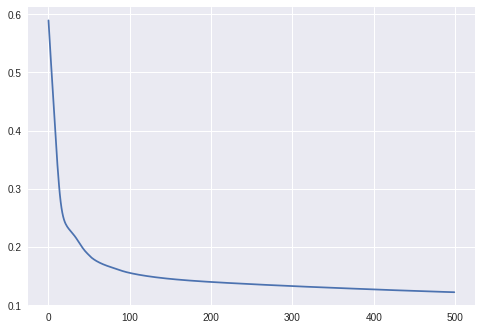

In [398]:
plt.plot(list_loss)

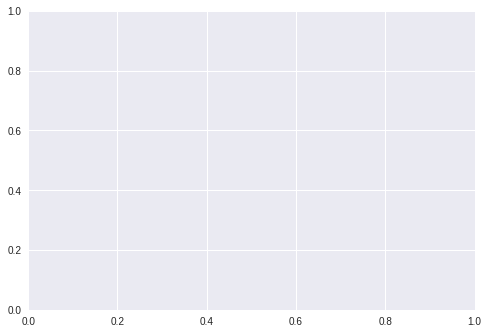

In [407]:
ax = plt.gca()

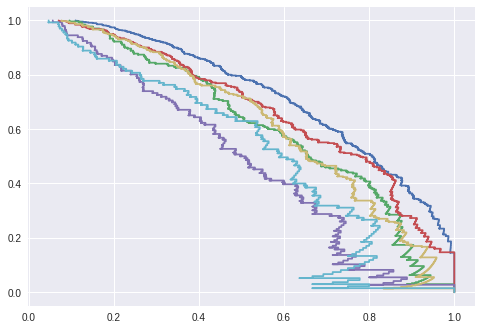

In [404]:
#sum_train = 0
#sum_dev = 0
for i in range(3):
    roc_train = sklearn.metrics.precision_recall_curve(labels_train[:, i], y_score_train[:, i])
    roc_dev = sklearn.metrics.precision_recall_curve(labels_dev[:, i], y_score_dev[:, i])
#    sum_train += sklearn.metrics.auc(roc_train[0], roc_train[1])
#    sum_dev += sklearn.metrics.auc(roc_dev[0], roc_dev[1])
    plt.step(roc_train[0], roc_train[1])
    plt.step(roc_dev[0], roc_dev[1])

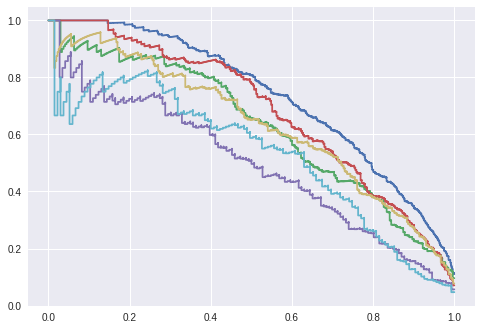

In [408]:
#sum_train = 0
#sum_dev = 0
for i in range(3):
    roc_train = sklearn.metrics.precision_recall_curve(labels_train[:, i], y_score_train[:, i])
    roc_dev = sklearn.metrics.precision_recall_curve(labels_dev[:, i], y_score_dev[:, i])
#    sum_train += sklearn.metrics.auc(roc_train[0], roc_train[1])
#    sum_dev += sklearn.metrics.auc(roc_dev[0], roc_dev[1])
    plt.step(roc_train[1], roc_train[0])
    plt.step(roc_dev[1], roc_dev[0])

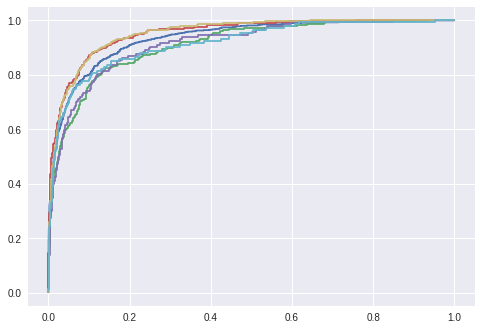

In [405]:
sum_train = 0
sum_dev = 0
for i in range(3):
    roc_train = sklearn.metrics.roc_curve(labels_train[:, i], y_score_train[:, i])
    roc_dev = sklearn.metrics.roc_curve(labels_dev[:, i], y_score_dev[:, i])
    sum_train += sklearn.metrics.auc(roc_train[0], roc_train[1])
    sum_dev += sklearn.metrics.auc(roc_dev[0], roc_dev[1])
    plt.step(roc_train[0], roc_train[1])
    plt.step(roc_dev[0], roc_dev[1])

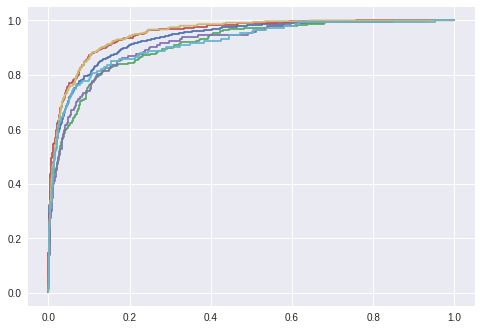

In [399]:
sum_train = 0
sum_dev = 0
for i in range(3):
    roc_train = sklearn.metrics.roc_curve(labels_train[:, i], y_score_train[:, i])
    roc_dev = sklearn.metrics.roc_curve(labels_dev[:, i], y_score_dev[:, i])
    sum_train += sklearn.metrics.auc(roc_train[0], roc_train[1])
    sum_dev += sklearn.metrics.auc(roc_dev[0], roc_dev[1])
    plt.plot(roc_train[0], roc_train[1])
    plt.plot(roc_dev[0], roc_dev[1])

In [401]:
evaluate.evaluate_all(labels_train, y_score_train, ['roc', 'prc'], ['toxic', 'obscene', 'insult'])

Roc auc of toxic = 0.9356
Roc auc of obscene = 0.9523
Roc auc of insult = 0.9530
Mean column-wise ROC AUC = 0.9530
Average precision of toxic = 0.7351
Average precision of obscene = 0.6849
Average precision of insult = 0.6344
Mean column-wise average precision = 0.6344


{'prc': {'average': 0.6848005183479507,
  'insult': 0.6343898735533773,
  'obscene': 0.6849399345187406,
  'toxic': 0.7350717469717345},
 'roc': {'average': 0.9469651026916631,
  'insult': 0.9529799057849042,
  'obscene': 0.9522681662072797,
  'toxic': 0.9356472360828054}}

In [454]:
reload(utils)

<module 'utils' from 'utils.pyc'>

In [465]:
y_dict = {'train': (labels_train, y_score_train),
          'dev': (labels_dev, y_score_dev)}

In [ ]:
reload(evaluate)

<module 'evaluate' from 'evaluate.py'>

Mean column-wise average precision - train = 0.6848
Mean column-wise average precision - dev = 0.5511
average precision of toxic - train = 0.7351
average precision of toxic - dev = 0.6284
average precision of obscene - train = 0.6849
average precision of obscene - dev = 0.4945
average precision of insult - train = 0.6344
average precision of insult - dev = 0.5303


{'average': {'dev': 0.551095918095008, 'train': 0.6848005183479507},
 'insult': {'dev': 0.5303331592629329, 'train': 0.6343898735533773},
 'obscene': {'dev': 0.49452153340803245, 'train': 0.6849399345187406},
 'toxic': {'dev': 0.6284330616140588, 'train': 0.7350717469717345}}

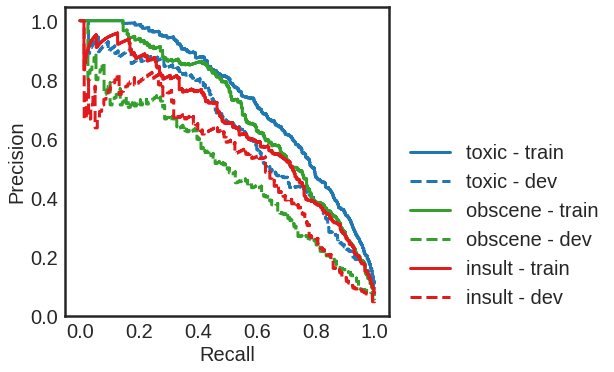

In [486]:
evaluate.evaluate_full(y_dict, names=['toxic', 'obscene', 'insult'], plot=True, metric='prc')

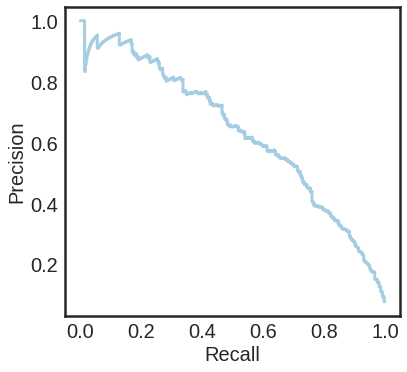

In [437]:
evaluate.plot_metric_curve(labels_train[:, i], y_score_train[:, i], 'prc')

In [443]:
test[test.keys()[0]]

1

In [445]:
'b' in test

False

In [3]:
train_data = pd.read_csv('CS224N-project/data/train.csv')
test_data = pd.read_csv('CS224N-project/data/test.csv')
sub_data = pd.read_csv('CS224N-project/data/sample_submission.csv')

In [5]:
print train_data.shape
print test_data.shape
print sub_data.shape

(159571, 8)
(153164, 2)
(153164, 7)


In [7]:
train_data.columns

Index([u'id', u'comment_text', u'toxic', u'severe_toxic', u'obscene',
       u'threat', u'insult', u'identity_hate'],
      dtype='object')

In [11]:
train_data[['toxic', u'severe_toxic', u'obscene',
       u'threat', u'insult', u'identity_hate']].sum(axis=0)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [26]:
train_data[['toxic', 'severe_toxic']].values

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [23]:
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
